In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h1>Load Data and Create DataFrame</h1>

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


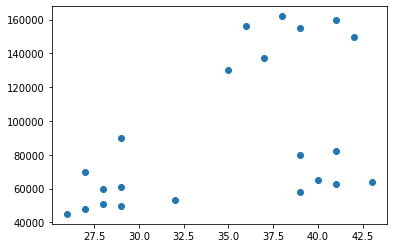

In [3]:
plt.scatter(df['Age'], df['Income($)'])

<h1>K Means Clustering</h1>

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [7]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

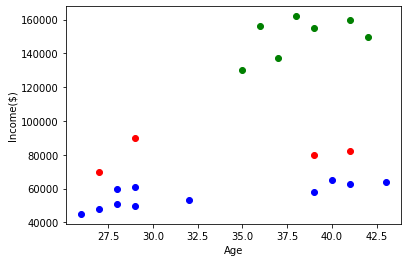

In [8]:
plt.xlabel('Age')
plt.ylabel('Income($)')

plt.scatter(df0['Age'], df0['Income($)'], color='red')
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')

<h1>Scaling Dataset</h1>

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


<h1>K Means Clustering</h1>

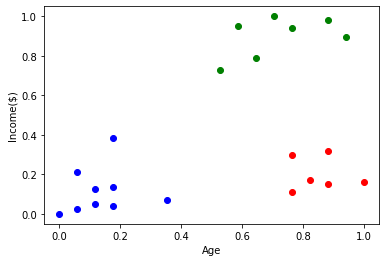

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(df[['Age', 'Income($)']])

df['cluster'] = y_predicted

df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.xlabel('Age')
plt.ylabel('Income($)')

plt.scatter(df0['Age'], df0['Income($)'], color='red')
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')

<h1>Centroid</h1>

In [11]:
centroids = km.cluster_centers_
centroids

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

<h1>Plotting with Centroids</h1>

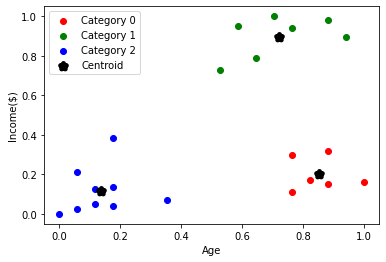

In [12]:
plt.xlabel('Age')
plt.ylabel('Income($)')

plt.scatter(df0['Age'], df0['Income($)'], color='red', label='Category 0')
plt.scatter(df1['Age'], df1['Income($)'], color='green', label='Category 1')
plt.scatter(df2['Age'], df2['Income($)'], color='blue', label='Category 2')

plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='*', linewidth=5, label='Centroid')

plt.legend()

<h1>Elbow Technique</h1>

In [13]:
k_range = range(1, 10)
sse = []

for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit_predict(df[['Age', 'Income($)']])
    
    sse.append(km.inertia_)
    
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.22020960864009395,
 0.1685851223602976,
 0.13781880133764024,
 0.1062989742140513]

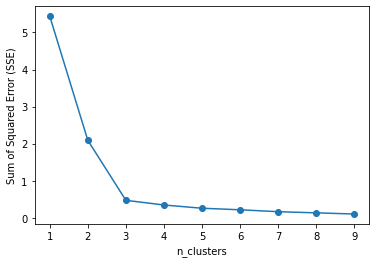

In [14]:
plt.xlabel('n_clusters')
plt.ylabel('Sum of Squared Error (SSE)')

plt.plot(k_range, sse, marker='o')